# **EDA Image Processing**

## Team Member  
1. Moch Faiz Febriawan ( 23031554068 )
2. Rakan Refaya Dewangga ( 23031554108 )
3. Alamsyah Ramadhan Vaganza ( 23031554192 )

## Load Library

In [45]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Exploratory Data Analysis**

## Distribusi Kelas

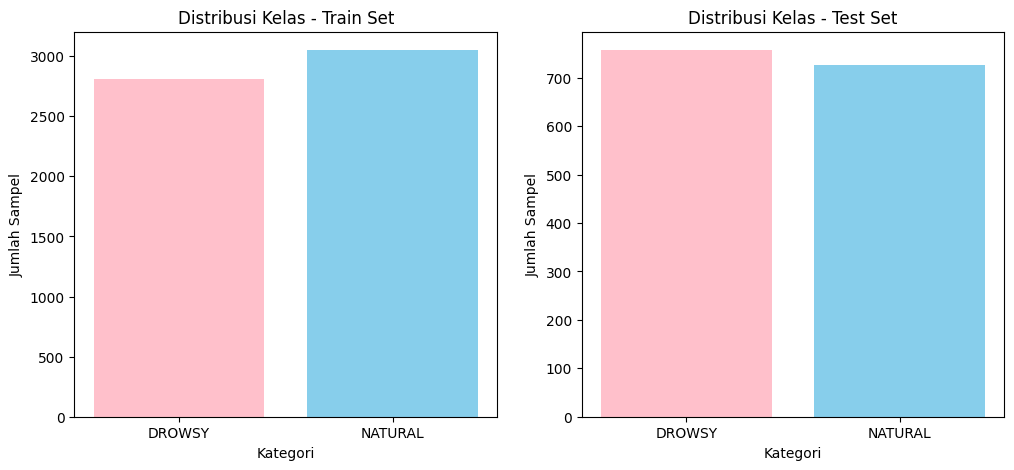

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

dataset_folder = 'Drowsy_datset'
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

def load_images_from_folder(folder):
    images = []
    labels = []
    
    for label, subfolder in enumerate(['DROWSY', 'NATURAL']):
        subfolder_path = os.path.join(folder, subfolder)
        
        if not os.path.exists(subfolder_path):
            print(f"Folder {subfolder_path} tidak ditemukan!")
            continue

        for img_name in os.listdir(subfolder_path):
            if img_name.endswith('.png'):
                img_path = os.path.join(subfolder_path, img_name)
                
                img = cv2.imread(img_path)
                
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
                    labels.append(label)
    
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

labels = ["DROWSY", "NATURAL"]
train_values = [train_counts.get(0, 0), train_counts.get(1, 0)]
test_values = [test_counts.get(0, 0), test_counts.get(1, 0)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(labels, train_values, color=['pink', 'skyblue'])
axes[0].set_title("Distribusi Kelas - Train Set")
axes[0].set_xlabel("Kategori")
axes[0].set_ylabel("Jumlah Sampel")

axes[1].bar(labels, test_values, color=['pink', 'skyblue'])
axes[1].set_title("Distribusi Kelas - Test Set")
axes[1].set_xlabel("Kategori")
axes[1].set_ylabel("Jumlah Sampel")

plt.show()


## Sampel Gambar

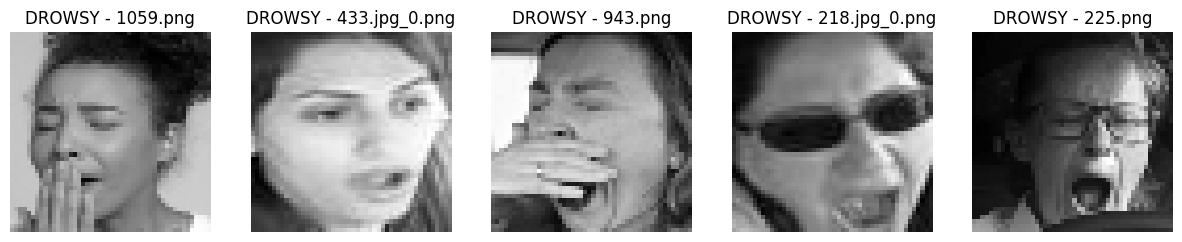

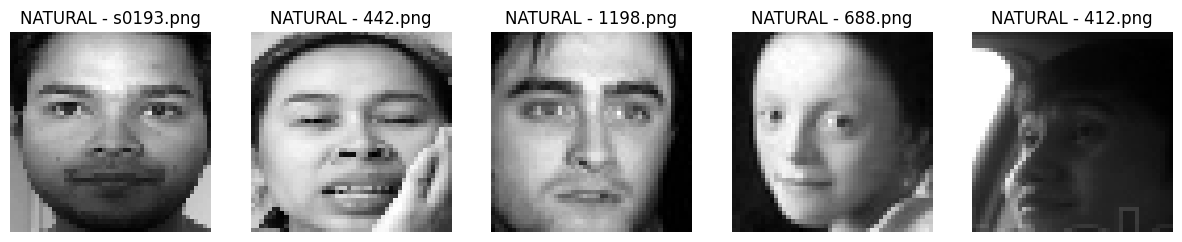

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

def show_sample_images(folder, category):
    category_path = os.path.join(folder, category)
    images = random.sample(os.listdir(category_path), 5)
    
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{category} - {img_name}")
        plt.axis('off')
    plt.show()

show_sample_images(train_folder, 'DROWSY')
show_sample_images(train_folder, 'NATURAL')


## Histogram Distribusi Pixel

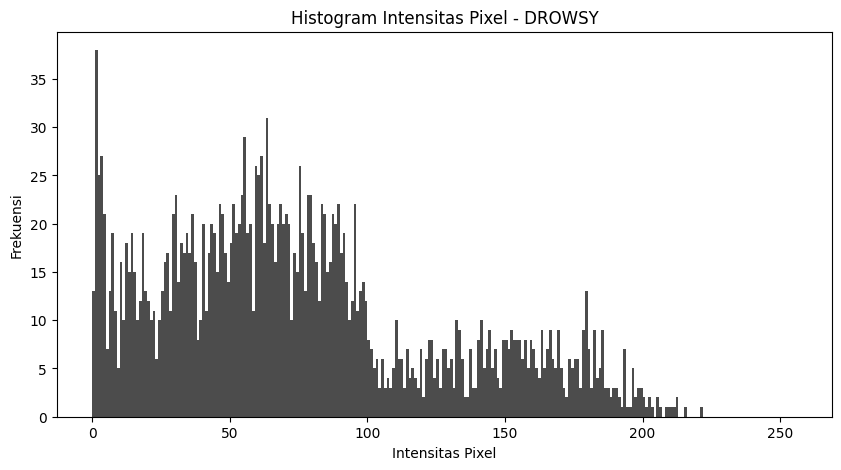

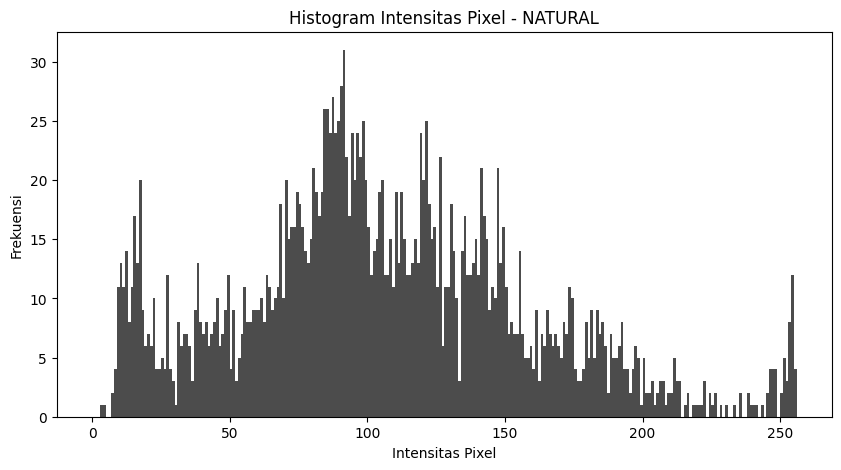

In [ ]:
def plot_histogram(folder, category):
    category_path = os.path.join(folder, category)
    img_name = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, img_name)
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(10, 5))
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title(f"Histogram Intensitas Pixel - {category}")
    plt.xlabel("Intensitas Pixel")
    plt.ylabel("Frekuensi")
    plt.show()

plot_histogram(train_folder, 'DROWSY')
plot_histogram(train_folder, 'NATURAL')


## Mean Gambar

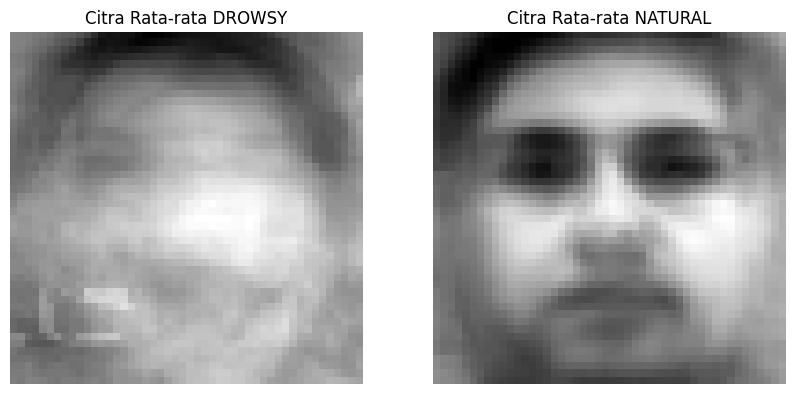

In [ ]:
import numpy as np

def compute_mean_image(folder, category):
    category_path = os.path.join(folder, category)
    images = []
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    
    mean_img = np.mean(images, axis=0)
    return mean_img

mean_drowsy = compute_mean_image(train_folder, 'DROWSY')
mean_natural = compute_mean_image(train_folder, 'NATURAL')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mean_drowsy, cmap='gray')
plt.title("Citra Rata-rata DROWSY")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_natural, cmap='gray')
plt.title("Citra Rata-rata NATURAL")
plt.axis('off')

plt.show()


## Analisis Kontras dan Kecerahan

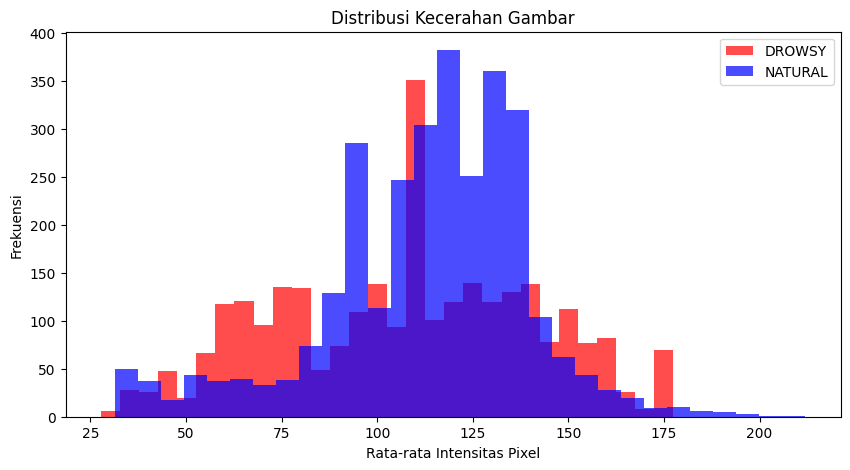

In [ ]:
def compute_brightness_contrast(folder, category):
    category_path = os.path.join(folder, category)
    brightness_values = []
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            brightness = np.mean(img)
            brightness_values.append(brightness)
    
    return brightness_values

brightness_drowsy = compute_brightness_contrast(train_folder, 'DROWSY')
brightness_natural = compute_brightness_contrast(train_folder, 'NATURAL')

plt.figure(figsize=(10, 5))
plt.hist(brightness_drowsy, bins=30, alpha=0.7, label="DROWSY", color='red')
plt.hist(brightness_natural, bins=30, alpha=0.7, label="NATURAL", color='blue')
plt.title("Distribusi Kecerahan Gambar")
plt.xlabel("Rata-rata Intensitas Pixel")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


## Analisis Perbedaan Tekstur

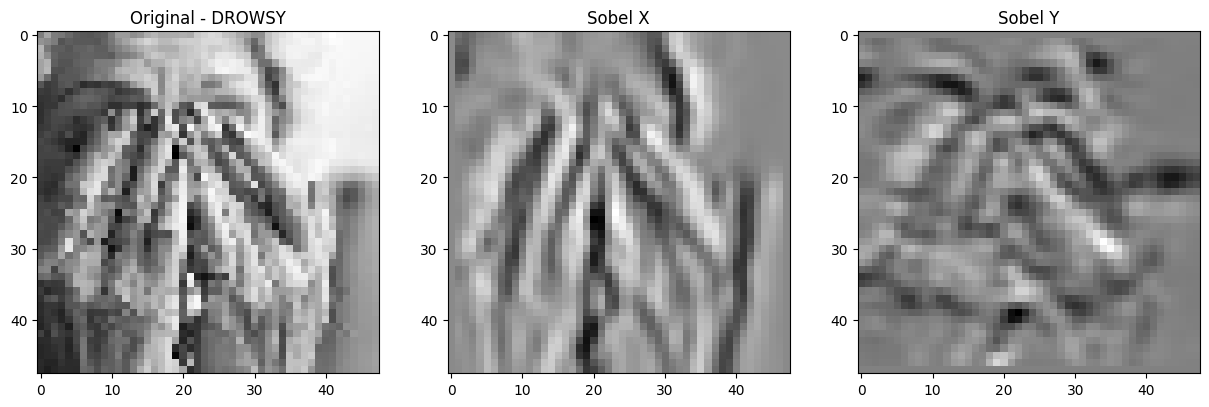

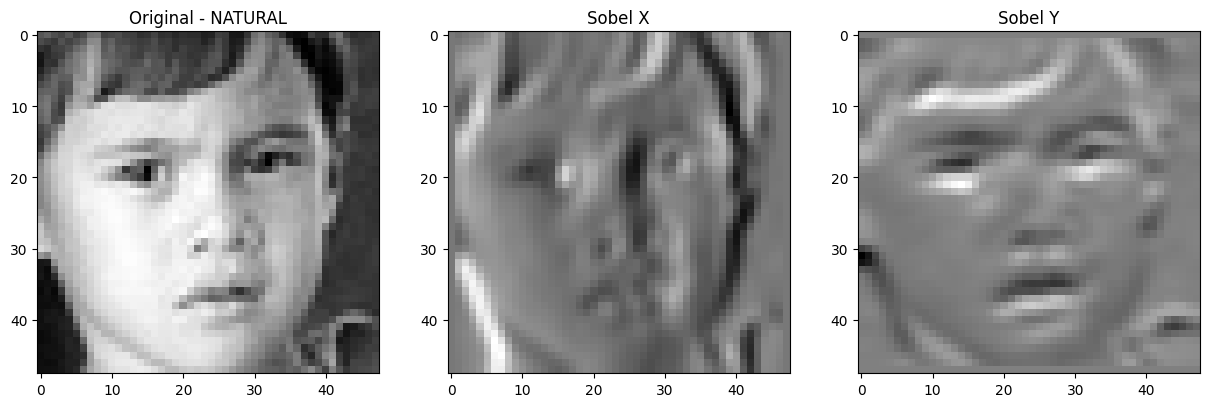

In [51]:
def apply_sobel_filter(folder, category):
    category_path = os.path.join(folder, category)
    img_name = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, img_name)
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original - {category}")

    plt.subplot(1, 3, 2)
    plt.imshow(sobelx, cmap='gray')
    plt.title("Sobel X")

    plt.subplot(1, 3, 3)
    plt.imshow(sobely, cmap='gray')
    plt.title("Sobel Y")

    plt.show()

apply_sobel_filter(train_folder, 'DROWSY')
apply_sobel_filter(train_folder, 'NATURAL')


## Ekstraksi FItur Tekstur Mata

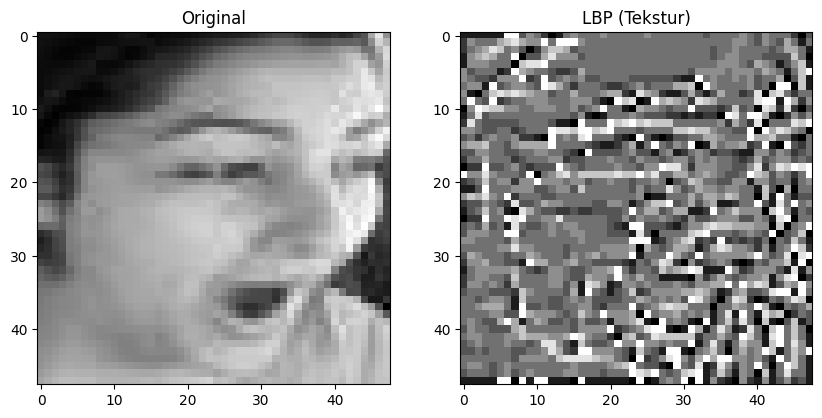

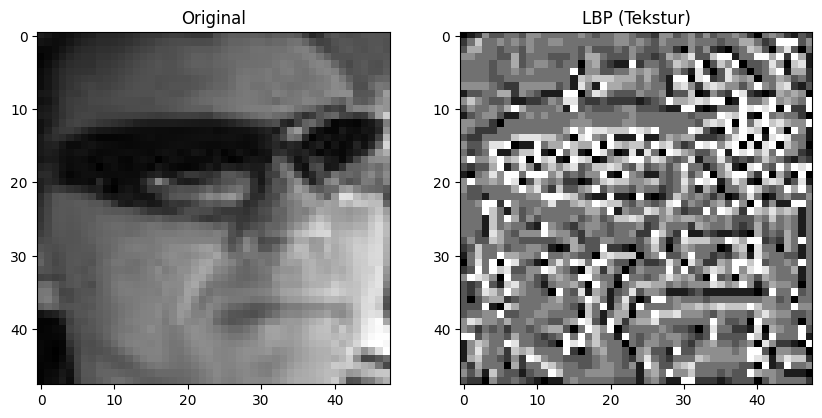

In [59]:
from skimage.feature import local_binary_pattern

def extract_eye_texture(folder, category):
    category_path = os.path.join(folder, category)
    img_name = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, img_name)
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(img, P=8, R=1, method="uniform")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")

    plt.subplot(1, 2, 2)
    plt.imshow(lbp, cmap='gray')
    plt.title("LBP (Tekstur)")
    plt.show()

extract_eye_texture(train_folder, 'DROWSY')
extract_eye_texture(train_folder, 'NATURAL')


## Analisis Pola Kontur Wajah

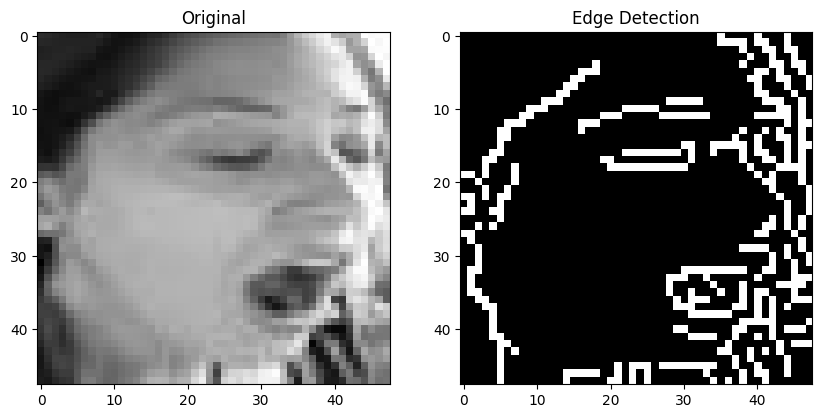

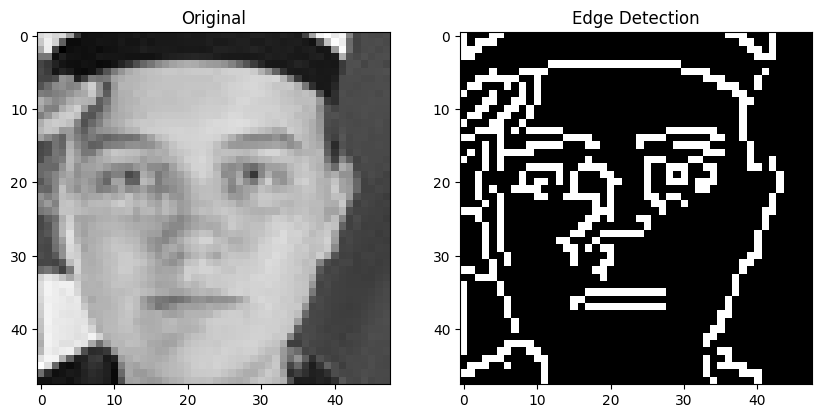

In [66]:
def detect_edges(folder, category):
    category_path = os.path.join(folder, category)
    img_name = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, img_name)

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.show()

detect_edges(train_folder, 'DROWSY')
detect_edges(train_folder, 'NATURAL')


# **Build Model**

## Load Library

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50V2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

## Preprocessing Gambar

In [ ]:
dataset_folder = 'Drowsy_datset'
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

def load_images_from_folder(folder):
    images, labels = [], []

    for label, subfolder in enumerate(['DROWSY', 'NATURAL']):
        subfolder_path = os.path.join(folder, subfolder)

        for img_name in os.listdir(subfolder_path):
            if img_name.endswith('.png'):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)

                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)


## Split Data


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

## Augmentasi Data

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow(X_train, y_train, batch_size=32)


## Bangun Arsitektur Model Neural Network

In [ ]:
def build_drowsy_natural_model(num_classes):
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    inputs = base_model.input
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model_drowsy_natural = build_drowsy_natural_model(num_classes=2)
model_drowsy_natural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_drowsy_natural.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,827,330 (90.89 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

## Training Model CNN

In [71]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_drowsy_natural = model_drowsy_natural.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[lr_scheduler, early_stopping]
)


C:\Users\LOQ\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 121s 800ms/step - accuracy: 0.8019 - loss: 0.4519 - val_accuracy: 0.9394 - val_loss: 0.1424 - learning_rate: 0.0010
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 130s 887ms/step - accuracy: 0.9021 - loss: 0.2305 - val_accuracy: 0.9497 - val_loss: 0.1148 - learning_rate: 0.0010
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 109s 743ms/step - accuracy: 0.9144 - loss: 0.2027 - val_accuracy: 0.9437 - val_loss: 0.1355 - learning_rate: 0.0010
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 109s 742ms/step - accuracy: 0.9255 - loss: 0.1844 - val_accuracy: 0.9462 - val_loss: 0.1164 - learning_rate: 0.0010
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 109s 739ms/step - accuracy: 0.9266 - loss: 0.1790 - val_accuracy: 0.9599 - val_loss: 0.0952 - learning_rate: 5.0000e-04
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 109s 739ms/step - accuracy: 0.9328 - loss: 0.1612 - val_accuracy: 0.9650 - val_loss: 0.0834 - learning_rate: 5.0000e-04
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 108s 737ms/step 

## Evaluasi Model

Validation Accuracy: 0.9701
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 570ms/step
Classification Report:
              precision    recall  f1-score   support

      Drowsy       0.96      0.98      0.97       581
     Natural       0.98      0.96      0.97       591

    accuracy                           0.97      1172
   macro avg       0.97      0.97      0.97      1172
weighted avg       0.97      0.97      0.97      1172



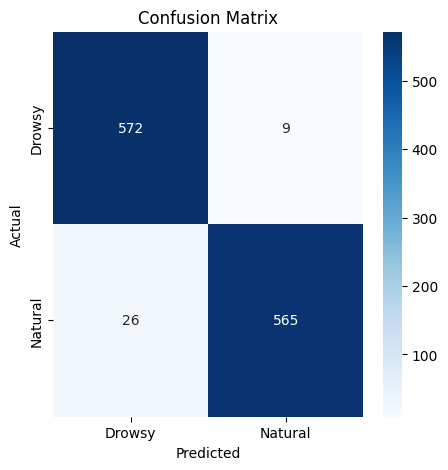

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_loss, val_acc = model_drowsy_natural.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

y_pred = model_drowsy_natural.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=['Drowsy', 'Natural']))

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Drowsy', 'Natural'], yticklabels=['Drowsy', 'Natural'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Visualisasi Hasil Training

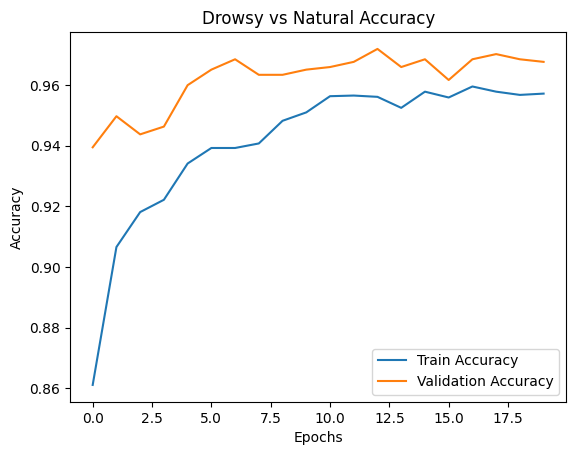

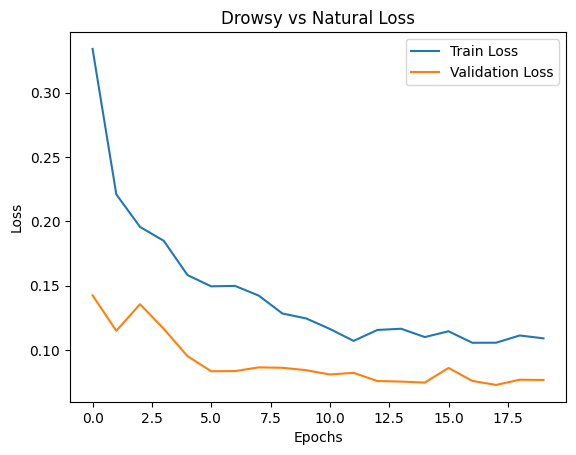

In [73]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_drowsy_natural, 'Drowsy vs Natural Accuracy')


def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_loss(history_drowsy_natural, 'Drowsy vs Natural Loss')


# **Conclusion**

### Dengan melihat hasil TP TN dan FP FN model tersebut didapatkan kesimpulan bahwasanya model telah menunjukkan hasil yang cukup baik dalam menebak kelas Drowsy dan Natural, sehingga untuk kedepannya dalam perbaikan model dapat dilakukan dengan fine tunning parameter, menambah data latihan atau menggunakan metode augmentasi tambahan. 